In [6]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.layers import Dense, Activation, ELU, BatchNormalization
import keras.backend as K
%matplotlib inline

In [7]:
(X_train_dataset, y_train_dataset), (X_test_dataset, y_test_dataset) = keras.datasets.mnist.load_data()

In [8]:
def preprocess(x):
    x = np.float64(x)
    x = x.reshape(-1,28,28,1)
    x = 2 * (x / 255 - 0.5)
    x = np.clip(x, -1, 1)
    return x

def deprocess(x):
    x = 255 * (x / 2 + 1)
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

#preprocess
X_train_dataset = np.float64(X_train_dataset)
X_train_dataset = X_train_dataset.reshape(-1, 28, 28, 1)
X_train_dataset = (X_train_dataset / 255 - 0.5) * 2
X_train_dataset = np.clip(X_train_dataset, -1, 1)

X_test_dataset = preprocess(X_test_dataset)

In [9]:
def toggle_train(m, b):
    for l in m.layers:
        l.trainable = b

def create_gen(size, alpha):
    return Sequential([
        Dense(784, input_shape=(size, )),
        Reshape(target_shape=(7,7,16)),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(32, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Conv2DTranspose(1, kernel_size=5, strides=2, padding='same'),
        Activation('tanh')
    ])

def create_disc(alpha):
    return Sequential([
        Conv2D(32, kernel_size=5, strides=2, padding='same', input_shape=(28,28,1)),
        ELU(alpha=alpha),
        Conv2D(16, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Flatten(),
        Dense(784),
        BatchNormalization(),
        ELU(alpha=alpha),
        
        Dense(1),
        Activation('sigmoid')
        
    ])

def make_Dc_GAN():
    size = 100 
    alpha = 0.2
    beta = 0.9
    gen_lr = 0.0001
    disc_lr = 0.001
    gen = create_gen(size, alpha)
    disc = create_disc(alpha)
    
    disc.compile(optimizer=Adam(lr=disc_lr, beta_1=beta), loss='binary_crossentropy')
    gan = Sequential([
        gen, disc
    ])
    gan.compile(optimizer=Adam(lr=gen_lr, beta_1=beta), loss='binary_crossentropy')
    return gan, disc, gen
    

In [10]:
label_train_real = np.ones([128,1])
label_train_fake = np.zeros([128,1])

label_eval_real = np.ones([16,1])
label_eval_fake = np.zeros([16,1])

gan, disc, gen = make_Dc_GAN()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Users/Kelvin/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


On Epoch: 1/100 Discriminator Loss: 1.2636460065841675 Generator Loss: 2.178215742111206
On Epoch: 2/100 Discriminator Loss: 3.108980417251587 Generator Loss: 1.889733076095581
On Epoch: 3/100 Discriminator Loss: 3.3917529582977295 Generator Loss: 2.624974250793457
On Epoch: 4/100 Discriminator Loss: 4.021623611450195 Generator Loss: 3.2389326095581055
On Epoch: 5/100 Discriminator Loss: 3.302027940750122 Generator Loss: 3.468402862548828
On Epoch: 6/100 Discriminator Loss: 1.6916035413742065 Generator Loss: 0.5833369493484497
On Epoch: 7/100 Discriminator Loss: 2.593930959701538 Generator Loss: 0.4666966199874878
On Epoch: 8/100 Discriminator Loss: 3.6120922565460205 Generator Loss: 1.4654394388198853
On Epoch: 9/100 Discriminator Loss: 1.9053624868392944 Generator Loss: 0.4845495820045471
On Epoch: 10/100 Discriminator Loss: 2.0186030864715576 Generator Loss: 1.8239381313323975
Images on 10 epoch


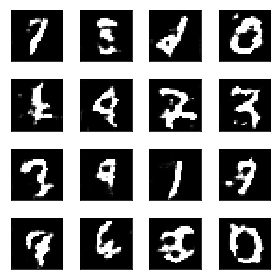

On Epoch: 11/100 Discriminator Loss: 2.049582004547119 Generator Loss: 2.5628674030303955
On Epoch: 12/100 Discriminator Loss: 1.8822174072265625 Generator Loss: 2.509636402130127
On Epoch: 13/100 Discriminator Loss: 2.493515968322754 Generator Loss: 0.9595316052436829
On Epoch: 14/100 Discriminator Loss: 1.3858691453933716 Generator Loss: 1.8999513387680054
On Epoch: 15/100 Discriminator Loss: 4.674810886383057 Generator Loss: 5.8596601486206055
On Epoch: 16/100 Discriminator Loss: 1.5921483039855957 Generator Loss: 1.9233620166778564
On Epoch: 17/100 Discriminator Loss: 2.506833791732788 Generator Loss: 1.985764741897583
On Epoch: 18/100 Discriminator Loss: 3.3516058921813965 Generator Loss: 4.93605899810791
On Epoch: 19/100 Discriminator Loss: 1.8418200016021729 Generator Loss: 1.7719806432724
On Epoch: 20/100 Discriminator Loss: 5.692300796508789 Generator Loss: 5.479905128479004
Images on 20 epoch


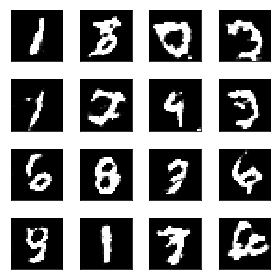

On Epoch: 21/100 Discriminator Loss: 1.727602243423462 Generator Loss: 1.2817941904067993
On Epoch: 22/100 Discriminator Loss: 3.6420326232910156 Generator Loss: 0.3111550509929657
On Epoch: 23/100 Discriminator Loss: 1.5690783262252808 Generator Loss: 0.6557379961013794
On Epoch: 24/100 Discriminator Loss: 3.088960647583008 Generator Loss: 0.0851815715432167
On Epoch: 25/100 Discriminator Loss: 4.0339555740356445 Generator Loss: 0.0660812258720398
On Epoch: 26/100 Discriminator Loss: 3.1698379516601562 Generator Loss: 0.1593402773141861
On Epoch: 27/100 Discriminator Loss: 1.5158530473709106 Generator Loss: 1.5939487218856812
On Epoch: 28/100 Discriminator Loss: 1.356060266494751 Generator Loss: 1.453007698059082
On Epoch: 29/100 Discriminator Loss: 1.7168910503387451 Generator Loss: 1.8187915086746216
On Epoch: 30/100 Discriminator Loss: 2.237504482269287 Generator Loss: 2.1716272830963135
Images on 30 epoch


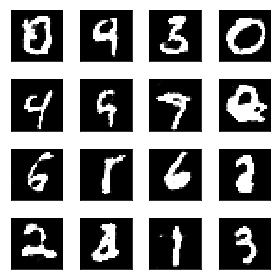

On Epoch: 31/100 Discriminator Loss: 5.718183517456055 Generator Loss: 6.857691764831543
On Epoch: 32/100 Discriminator Loss: 2.8218016624450684 Generator Loss: 2.883517265319824
On Epoch: 33/100 Discriminator Loss: 1.9755980968475342 Generator Loss: 2.2868688106536865
On Epoch: 34/100 Discriminator Loss: 1.756119966506958 Generator Loss: 1.3436195850372314
On Epoch: 35/100 Discriminator Loss: 3.2120766639709473 Generator Loss: 3.938903331756592


In [ ]:
loss = []
for epochs in range(100):
    #
    for iterations in range(len(X_train_dataset)//128):
        X_batch_dataset = X_train_dataset[iterations * 128 : (iterations+1) * 128]
        #Create samples with a mean of 0 and S.D of 1
        random_set = np.random.normal(loc=0, scale=1, size=(128,100))
        X_batch_generated = gen.predict_on_batch(random_set)
        
        #Train disc
        toggle_train(disc, True)
        disc.train_on_batch(X_batch_dataset, label_train_real * (1-0.1))
        disc.train_on_batch(X_batch_generated, label_train_fake)
        
        #Train gen
        toggle_train(disc, False)
        gan.train_on_batch(random_set, label_train_real)
        
    X_eval_dataset = X_test_dataset[np.random.choice(len(X_test_dataset), 16, replace=False)]
    random_eval_set = np.random.normal(loc=0, scale=1, size=(16, 100))
    X_eval_generated = gen.predict_on_batch(random_eval_set)
    
    disc_loss = disc.test_on_batch(X_eval_dataset, label_eval_real)
    disc_loss += disc.test_on_batch(X_eval_generated, label_eval_fake)
    gan_loss = gan.test_on_batch(random_eval_set, label_eval_real)
    
    loss.append((disc_loss, gan_loss))
    
    print("On Epoch: {}/{} Discriminator Loss: {} Generator Loss: {}".format(epochs+1, 100, disc_loss, gan_loss))
    
    if (epochs+1)%10 == 0:
        print("Images on {} epoch".format(epochs+1))
        size = len(X_eval_generated)
        r = 4
        c = size//r
        plt.figure(figsize=(c, r))
        for i in range(size):
            img = deprocess(X_eval_generated[i])
            plt.subplot(r, c, i+1)
            plt.imshow(img, cmap='gray')
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()
loss = np.array(loss)
fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator Loss')
plt.plot(losses.T[1], label='Generator Loss')
plt.title("Train Loss")
plt.legend()
plt.show()

